In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red"></font></b>

In [9]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
import pandas as pd # 원핫이코딩
from tensorflow.keras.models import Sequential, load_model # 모델 생성
from tensorflow.keras.layers import Dense,Input
import numpy as np

# 딥러닝: 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타겟=종속변수)
        * 분류분석(타겟변수가 category 변수인 분석. 다중분류 vs 이진분류) va 회귀분석
    * 비지도학습(입력변수)
        * 군집화
    * 강화학습
- 지도학습에서의 딥러닝 프로그래밍 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋, 원핫인코딩
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습시키기(훈련, 검증데이터셋)
- 6. 모델 평가(시험데이터셋)
- 7. 모델 저장/사용(입력값을 주어지면 예측값을 받기)

#  1. 데이터 확보 및 생성

# 2. 데이터 전처리

In [13]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
#y_train
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

In [21]:
# 인코딩 종류 
# 라벨인코딩=문자를 숫자로 
# 원핫인코딩=값의 개수만큼 열을 만들고, 해당 범주에 해당하는 열에만 1을 나머지는 0으로
data = np.array(['a','b','c','b','b'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
laveling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', laveling_data)
one_hot_encoding_data = to_categorical(laveling_data)
print('원핫인코딩된 데이터 :\n',one_hot_encoding_data)

원 데이터 : ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 : [0 1 2 1 1]
원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [25]:
# 원핫인코딩(분류분석을 위한 target변수)
data = np.array([1, 4, 5, 4, 5])
categorical_onehot = to_categorical(data) # 원핫인코딩 결과가 numpy 배열
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data) # 원핫인코딩 결과가 DataFrame
print('get_dummies 이용\n', getdummies_onehot)
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [26]:
getdummies_onehot

,1,4,5
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [27]:
# 분류분석을 위한 타겟변수 원핫인코딩
Y_train = to_categorical(y_train,19)
Y_val = to_categorical(y_val)

In [46]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델구성

In [35]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) # 활성화 함수:relu, elu, tanh, sigmoid
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax')) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 38)                76        
                                                                 
 dense_14 (Dense)            (None, 64)                2496      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 분류분석에서의 loss : categorical_crossentropy
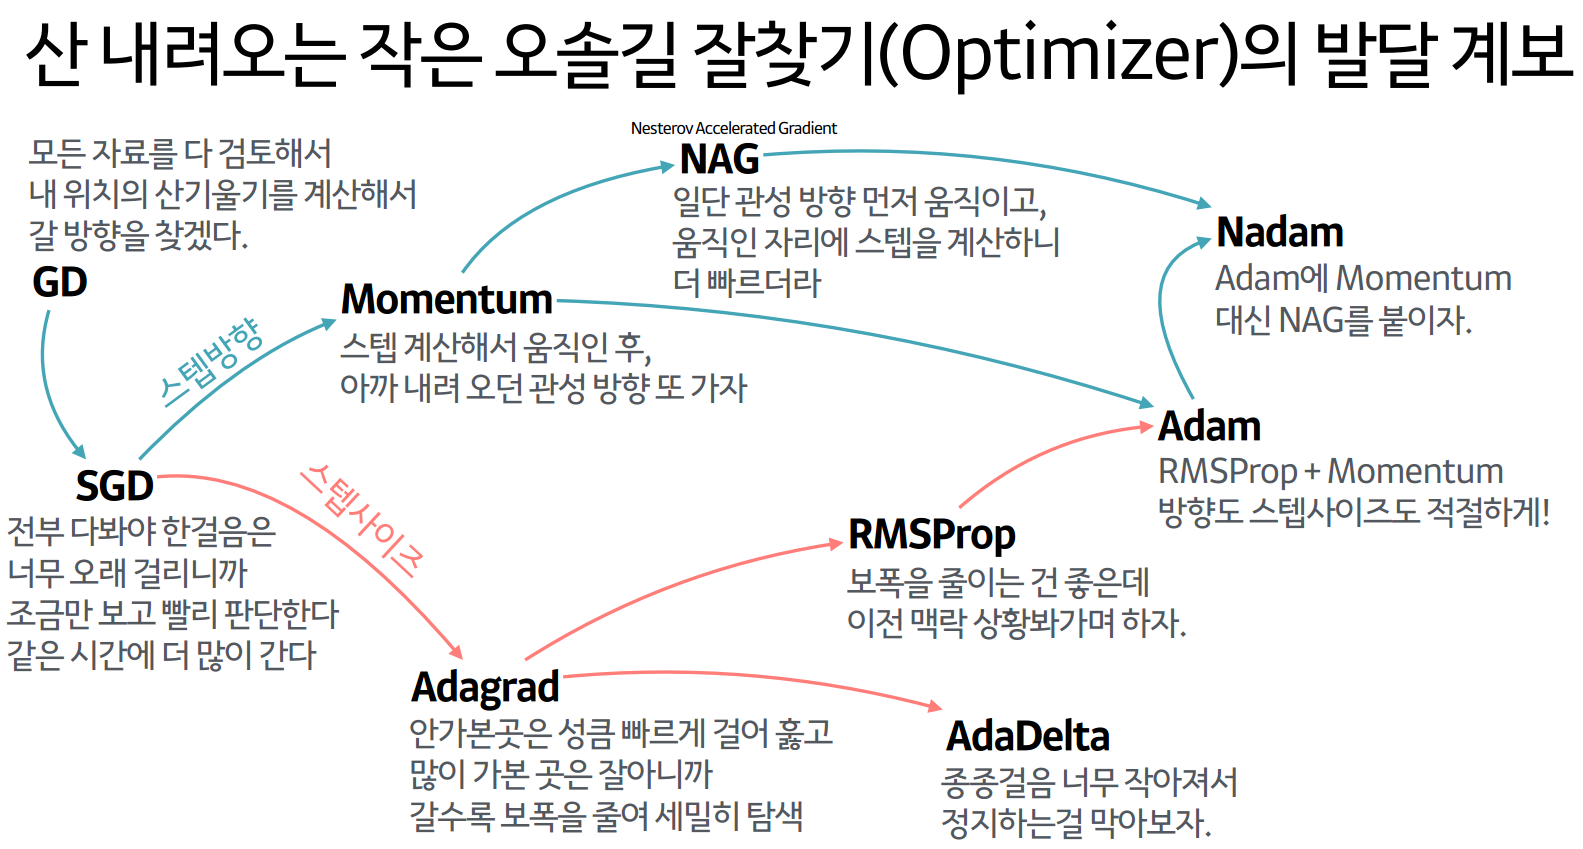

In [45]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 5. 모델학습시키기

In [47]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,
                validation_data=(x_val, Y_val), verbose=2)
# verbose=0:출력없음 / 1:기본값출력 / 2:에포크별 자세한 로그 출력

Epoch 1/300
9/9 - 1s - loss: 2.8525 - accuracy: 0.0889 - val_loss: 2.6629 - val_accuracy: 0.2222 - 502ms/epoch - 56ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5928 - accuracy: 0.1889 - val_loss: 2.4780 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4426 - accuracy: 0.1889 - val_loss: 2.3557 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3146 - accuracy: 0.2667 - val_loss: 2.2531 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2334 - accuracy: 0.1556 - val_loss: 2.1744 - val_accuracy: 0.2222 - 30ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1565 - accuracy: 0.2111 - val_loss: 2.1055 - val_accuracy: 0.2222 - 30ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0854 - accuracy: 0.3111 - val_loss: 2.0425 - val_accuracy: 0.2222 - 29ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0338 - accuracy: 0.2667 - val_loss: 1.9827 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.3787 - accuracy: 1.0000 - val_loss: 0.3780 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3751 - accuracy: 1.0000 - val_loss: 0.3597 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3543 - accuracy: 1.0000 - val_loss: 0.3431 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3427 - accuracy: 1.0000 - val_loss: 0.3312 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3376 - accuracy: 1.0000 - val_loss: 0.3309 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3227 - accuracy: 1.0000 - val_loss: 0.3170 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3166 - accuracy: 1.0000 - val_loss: 0.3021 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2990 - accuracy: 1.0000 - val_loss: 0.2901 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0366 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 1.0000 - 26ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000 - 26ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 278/300
9/

# 6.모델 평기하기(모델학습과정 살펴보고 evaluate)

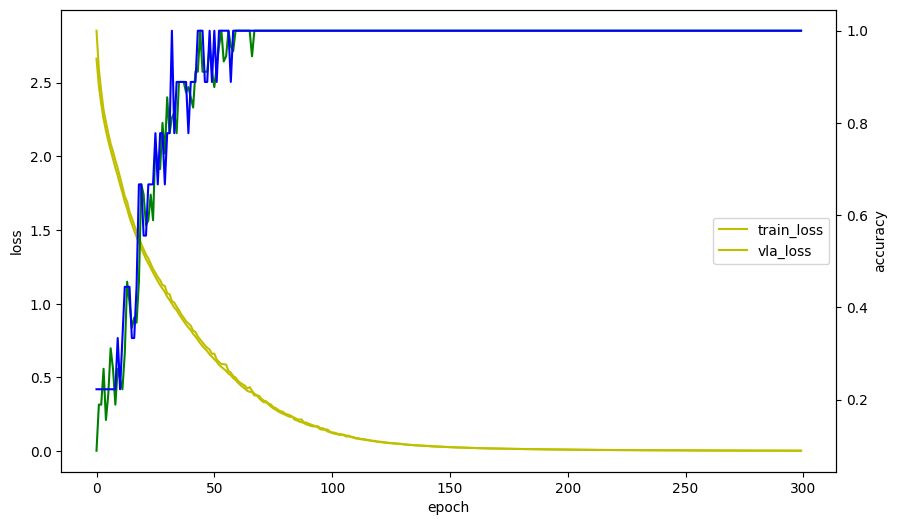

In [53]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax =plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='vla_loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train_loss')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.legend(loc='center right')
plt.show()

In [55]:
# 모델 평가하기(테스트데이터셋으로 모델 학습 설정과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss :', score[0])
print('accuracy :', score[1])

3/3 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
loss : 0.0026999160181730986
accuracy : 1.0


# 7.모델 사용하기(모델을 이용해서 예측하기)

In [57]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 16ms/step


4

In [58]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 16ms/step


4

In [60]:
# 몇%의 확률로4라고 예측했니?
H[0, H.argmax()] * 100

99.85982775688171

In [61]:
# 2,3,6의 확률
H[0, [2,3,4]] * 100

array([7.0940629e-02, 3.9356058e-28, 9.9859825e+01], dtype=float32)

# 7.모델저장

In [69]:
model.save('model/02_deep.h5')

In [70]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')

In [71]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 42ms/step


6